In [1]:
import numpy as np
import random
from keras import Sequential
from keras.models import Model
from keras.layers import Dense, Input, Activation
from keras import optimizers
import matplotlib.pyplot as plt

Using TensorFlow backend.


### Generate data

In [14]:
#Pick 2000 random points on the square [-1,1]x[-1,1] and group them into 2 categories (0 and 1)
points=[]
labels=[]
for i in range(2000):
    x=random.uniform(-1,1)
    y=random.uniform(-1,1)
    
    points+=[[x,y]]
    #labels+=[0] if x>0 else [1]
    #labels+=[0] if x*x+y*y>0.5 else [1]
    labels+=[0] if (x+0.4)*(x+0.4)+(y-0.5)*(y-0.5)<0.03 or\
                    (x-0.4)*(x-0.4)+(y-0.5)*(y-0.5)<0.03 or\
                    (x*x+y*y>0.4 and x*x+y*y<0.6 and y<0)\
                else  [1]

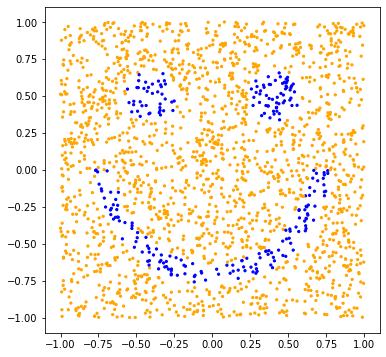

In [15]:
#Plot the two categories
x=[points[i][0] for i in range(len(points))]
y=[points[i][1] for i in range(len(points))]
colors=np.array(['blue','orange'])
plt.figure(figsize=(6,6))
plt.scatter(x,y,c=colors[labels],s=5)

### Define Neural Network

In [16]:
# Create a network with 3 layers of 32 neurons each
# Probably the simplest way to do so
model = Sequential() 
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.build()

There are of course other kind of layers, not only Dense. I guess we will need Convolutional layers for our task. They can also be found in keras, under the name 'Conv2D'.

In [17]:
# this does the same but a bit more complicated
# on the other hand, one has more freedom when playing with the parameters
input_layer = Input(shape=[2])
hidden_layer1 = Dense(32, activation='relu')(input_layer)
hidden_layer2 = Dense(32, activation='relu')(hidden_layer1)
output_layer = Dense(1, activation='linear')(hidden_layer2)
model = Model(inputs=input_layer, outputs=output_layer)

### Train Neural Network 

In [22]:
model.compile(optimizer='adam',loss='mse')
#this just means that we want to minimize the mean squared error

In [23]:
#and this is the actual training part
model.fit([points], labels,batch_size=10, epochs=400, shuffle=True,verbose=1)

Epoch 1/400
2000/2000 [==============================] - 0s 192us/step - loss: 0.0287
Epoch 2/400
2000/2000 [==============================] - 0s 133us/step - loss: 0.0284
Epoch 3/400
2000/2000 [==============================] - 0s 120us/step - loss: 0.0291
Epoch 4/400
2000/2000 [==============================] - 0s 149us/step - loss: 0.0284
Epoch 5/400
2000/2000 [==============================] - 0s 123us/step - loss: 0.0283
Epoch 6/400
2000/2000 [==============================] - 0s 124us/step - loss: 0.0279
Epoch 7/400
2000/2000 [==============================] - 0s 147us/step - loss: 0.0274
Epoch 8/400
2000/2000 [==============================] - 0s 122us/step - loss: 0.0297
Epoch 9/400
2000/2000 [==============================] - 0s 141us/step - loss: 0.0270
Epoch 10/400
2000/2000 [==============================] - 0s 148us/step - loss: 0.0275
Epoch 11/400
2000/2000 [==============================] - 0s 136us/step - loss: 0.0280
Epoch 12/400
2000/2000 [============================

2000/2000 [==============================] - 0s 175us/step - loss: 0.0252
Epoch 96/400
2000/2000 [==============================] - 0s 137us/step - loss: 0.0245
Epoch 97/400
2000/2000 [==============================] - 0s 119us/step - loss: 0.0254
Epoch 98/400
2000/2000 [==============================] - 0s 145us/step - loss: 0.0244
Epoch 99/400
2000/2000 [==============================] - 0s 115us/step - loss: 0.0242
Epoch 100/400
2000/2000 [==============================] - 0s 117us/step - loss: 0.0250
Epoch 101/400
2000/2000 [==============================] - 0s 117us/step - loss: 0.0246
Epoch 102/400
2000/2000 [==============================] - 0s 115us/step - loss: 0.0240
Epoch 103/400
2000/2000 [==============================] - 0s 112us/step - loss: 0.0252
Epoch 104/400
2000/2000 [==============================] - 0s 114us/step - loss: 0.0241
Epoch 105/400
2000/2000 [==============================] - 0s 112us/step - loss: 0.0239
Epoch 106/400
2000/2000 [=========================

2000/2000 [==============================] - 0s 107us/step - loss: 0.0230
Epoch 189/400
2000/2000 [==============================] - 0s 108us/step - loss: 0.0225
Epoch 190/400
2000/2000 [==============================] - 0s 113us/step - loss: 0.0234
Epoch 191/400
2000/2000 [==============================] - 0s 107us/step - loss: 0.0221
Epoch 192/400
2000/2000 [==============================] - 0s 106us/step - loss: 0.0227
Epoch 193/400
2000/2000 [==============================] - 0s 109us/step - loss: 0.0229
Epoch 194/400
2000/2000 [==============================] - 0s 109us/step - loss: 0.0231
Epoch 195/400
2000/2000 [==============================] - 0s 108us/step - loss: 0.0224
Epoch 196/400
2000/2000 [==============================] - 0s 107us/step - loss: 0.0226
Epoch 197/400
2000/2000 [==============================] - 0s 106us/step - loss: 0.0223
Epoch 198/400
2000/2000 [==============================] - 0s 105us/step - loss: 0.0235
Epoch 199/400
2000/2000 [=====================

2000/2000 [==============================] - 0s 106us/step - loss: 0.0218
Epoch 282/400
2000/2000 [==============================] - 0s 107us/step - loss: 0.0218
Epoch 283/400
2000/2000 [==============================] - 0s 104us/step - loss: 0.0207
Epoch 284/400
2000/2000 [==============================] - 0s 104us/step - loss: 0.0210
Epoch 285/400
2000/2000 [==============================] - 0s 104us/step - loss: 0.0232
Epoch 286/400
2000/2000 [==============================] - 0s 105us/step - loss: 0.0214
Epoch 287/400
2000/2000 [==============================] - 0s 103us/step - loss: 0.0215
Epoch 288/400
2000/2000 [==============================] - 0s 108us/step - loss: 0.0214
Epoch 289/400
2000/2000 [==============================] - 0s 104us/step - loss: 0.0215
Epoch 290/400
2000/2000 [==============================] - 0s 104us/step - loss: 0.0206
Epoch 291/400
2000/2000 [==============================] - 0s 103us/step - loss: 0.0212
Epoch 292/400
2000/2000 [=====================

2000/2000 [==============================] - 0s 245us/step - loss: 0.0193
Epoch 375/400
2000/2000 [==============================] - 1s 351us/step - loss: 0.0204
Epoch 376/400
2000/2000 [==============================] - 0s 124us/step - loss: 0.0199
Epoch 377/400
2000/2000 [==============================] - 0s 138us/step - loss: 0.0208
Epoch 378/400
2000/2000 [==============================] - 0s 203us/step - loss: 0.0203
Epoch 379/400
2000/2000 [==============================] - 0s 176us/step - loss: 0.0196
Epoch 380/400
2000/2000 [==============================] - 0s 143us/step - loss: 0.0195
Epoch 381/400
2000/2000 [==============================] - 0s 152us/step - loss: 0.0193
Epoch 382/400
2000/2000 [==============================] - 0s 139us/step - loss: 0.0193
Epoch 383/400
2000/2000 [==============================] - 0s 120us/step - loss: 0.0196
Epoch 384/400
2000/2000 [==============================] - 0s 119us/step - loss: 0.0207
Epoch 385/400
2000/2000 [=====================

### Test

In [24]:
#create a fine grid and evaluate the network on them to see how it performs on previously unseen points
N=100
testpoints=[[x/N,y/N] for x in range(-1*N,N) for y in range(-1*N,N)]
label_predictions=np.array(model.predict([testpoints]))
testlabels=list(map((lambda x: 1 if x>0.5 else 0),label_predictions))

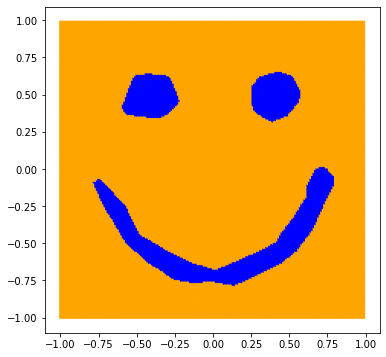

In [25]:
#plot
x_test=[testpoints[i][0] for i in range(len(testpoints))]
y_test=[testpoints[i][1] for i in range(len(testpoints))]
colors=np.array(['blue','orange'])
plt.figure(figsize=(6,6))
plt.scatter(x_test,y_test,c=colors[testlabels],s=2)